In [5]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
X = np.random.randint(25, 50, (25,2))
Y = np.random.randint(60, 85, (25,2))

Z = np.vstack((X,Y))
Z = Z.astype(np.float32)

print(Z)

[[44. 30.]
 [31. 37.]
 [31. 28.]
 [47. 39.]
 [33. 43.]
 [42. 47.]
 [26. 27.]
 [37. 25.]
 [29. 46.]
 [47. 30.]
 [48. 46.]
 [29. 40.]
 [44. 27.]
 [34. 42.]
 [33. 29.]
 [48. 28.]
 [43. 49.]
 [46. 25.]
 [32. 38.]
 [41. 41.]
 [46. 48.]
 [37. 25.]
 [44. 45.]
 [44. 31.]
 [39. 37.]
 [78. 82.]
 [62. 63.]
 [65. 76.]
 [76. 62.]
 [70. 73.]
 [84. 63.]
 [75. 74.]
 [77. 64.]
 [75. 61.]
 [82. 65.]
 [77. 65.]
 [78. 76.]
 [83. 78.]
 [70. 80.]
 [71. 64.]
 [66. 84.]
 [68. 72.]
 [71. 79.]
 [67. 64.]
 [68. 83.]
 [78. 67.]
 [67. 74.]
 [72. 60.]
 [64. 74.]
 [65. 80.]]


In [18]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [12]:
A = Z[label.ravel() == 0]
B = Z[label.ravel() == 1]

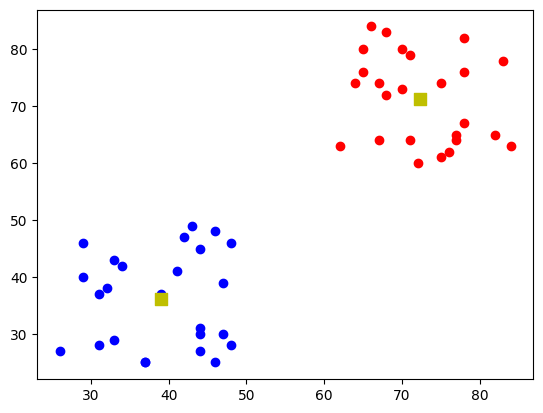

In [13]:
plt.scatter(A[:,0], A[:,1], c = 'b')
plt.scatter(B[:,0], B[:,1], c = 'r')
plt.scatter(center[:, 0], center[:,1], s=80, c='y', marker='s')
plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(600, 800, 3)


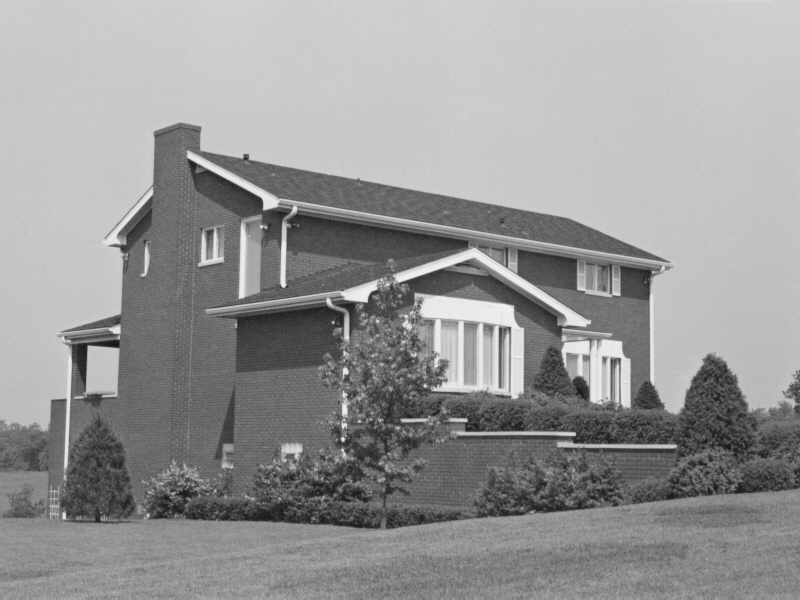

In [20]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

img = cv2.imread('/content/gdrive/MyDrive/ip/Images/home3.jpg')
if img is None:
    print("Error: Image not found or could not be loaded. Please check the file path.")
else:
    print(img.shape)
    glmg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cv2_imshow(glmg)

In [21]:
Z = img.reshape((-1,3))
Z = np.float32(Z)
print(Z.shape)

(480000, 3)


In [30]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
#ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

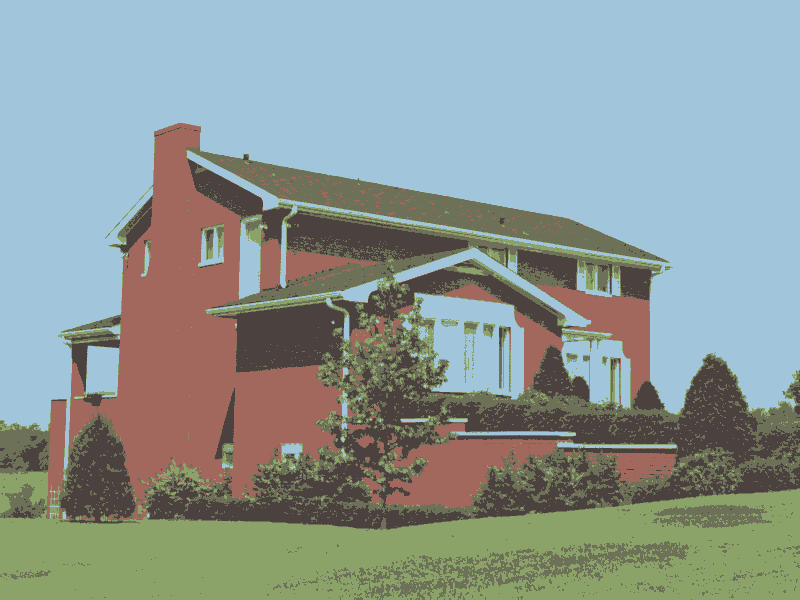

In [29]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)